In [1]:
#https://www.kaggle.com/datasets/asaniczka/reddit-on-israel-palestine-daily-updated

import pandas as pd
from typing import Type
import sys

sys.path.append("..")
from utils import print_memory_stats, change_obj_to_cat, get_memory_stats

file_name = "reddit_opinion_PSE_ISR.csv.zip"
column_types_name = "column_types.pkl"
ten_columns_name = "10_columns.csv"


def change_types(my_df: pd.DataFrame):
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_no_opt.json")
    print("before:")
    print(my_df.info(memory_usage="deep"))
    change_obj_to_cat(my_df)
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_opt.json")
    print("after:")
    print(my_df.info(memory_usage="deep"))


def save_10_columns(my_df: pd.DataFrame):
    column_names = [
        "score",
        "subreddit",
        "created_time",
        "author_name",
        "user_total_karma",
        "post_upvote_ratio",
        "post_created_time",
        "user_is_verified",
        "user_comment_karma",
        "user_total_karma",
    ]
    types = my_df.dtypes.to_dict()
    rf = pd.read_csv(
        file_name,
        usecols=lambda x: x in column_names,
        dtype=types,
    )
    compression_options = dict(method="zip", archive_name=ten_columns_name)
    rf.to_csv(f"{ten_columns_name}.zip", index=False, compression="zip")

    compression_options = dict(method="zip", archive_name=column_types_name)
    pd.to_pickle(types, f"{column_types_name}.zip", compression=compression_options)


my_df = pd.read_csv(file_name, compression="zip")
change_types(my_df)
save_10_columns(my_df)

loaded_column_types = pd.read_pickle(f"{column_types_name}.zip", compression="zip")
df = pd.read_csv(f"{ten_columns_name}.zip", dtype=loaded_column_types, compression="zip")
df

before:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526627 entries, 0 to 526626
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   comment_id                  526627 non-null  object 
 1   score                       526627 non-null  int64  
 2   self_text                   526624 non-null  object 
 3   subreddit                   526627 non-null  object 
 4   created_time                526627 non-null  object 
 5   post_id                     526627 non-null  object 
 6   author_name                 526627 non-null  object 
 7   controversiality            526627 non-null  int64  
 8   ups                         526627 non-null  int64  
 9   downs                       526627 non-null  int64  
 10  user_is_verified            526627 non-null  bool   
 11  user_account_created_time   516402 non-null  object 
 12  user_awardee_karma          526580 non-null  float64
 13  user_a

,score,subreddit,created_time,author_name,user_is_verified,user_comment_karma,user_total_karma,post_upvote_ratio,post_created_time
0,1,CombatFootage,2023-12-23 22:19:44,MondoUnderground,True,30780.0,46984.0,0.90,2023-12-23 17:05:05
1,1,IsraelPalestine,2023-12-23 22:19:22,pinchasthegris,True,19398.0,21669.0,0.60,2023-12-23 00:40:35
2,1,AskMiddleEast,2023-12-23 22:19:14,Abigail309,True,124.0,133.0,1.00,2023-12-23 15:49:19
3,1,worldnews,2023-12-23 22:18:21,Tagihi,True,36676.0,37650.0,0.85,2023-12-23 16:56:17
4,1,IsraelPalestine,2023-12-23 22:18:14,AdvanceAlarmed3571,True,-97.0,-96.0,0.50,2023-12-23 21:28:32
...,...,...,...,...,...,...,...,...,...
526622,64,ActualPublicFreakouts,2023-09-02 13:57:37,RevolutionarySoil11,True,15755.0,17768.0,0.94,2023-09-02 11:52:49
526623,214,ActualPublicFreakouts,2023-09-02 13:33:15,theXsquid,True,67601.0,97202.0,0.94,2023-09-02 11:52:49
526624,71,ActualPublicFreakouts,2023-09-02 13:24:53,P3ric,True,4938.0,18955.0,0.94,2023-09-02 11:52:49
526625,120,ActualPublicFreakouts,2023-09-02 12:17:34,[deleted],False,0.0,0.0,0.94,2023-09-02 11:52:49


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

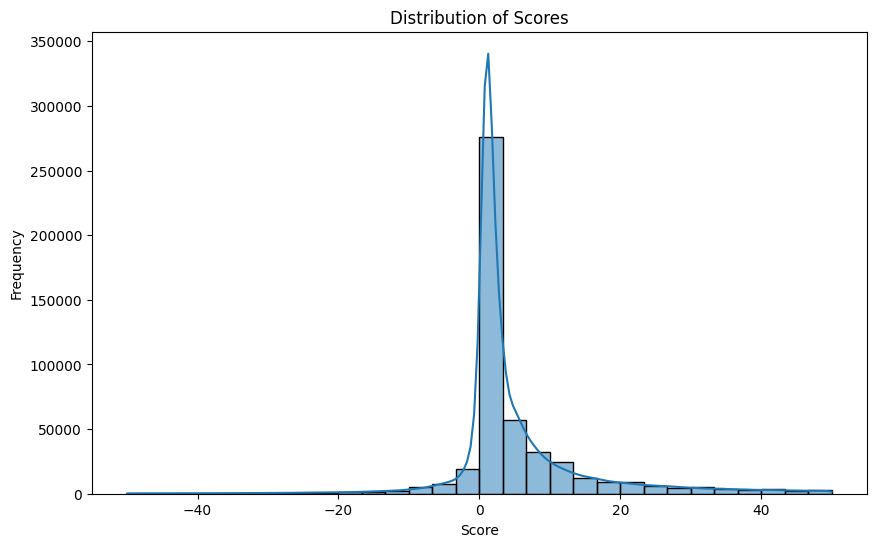

In [3]:
df_filtered_score = df[(df["score"] >= -50) & (df["score"] <= 50)]


plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_score['score'], bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'User Verification Status')

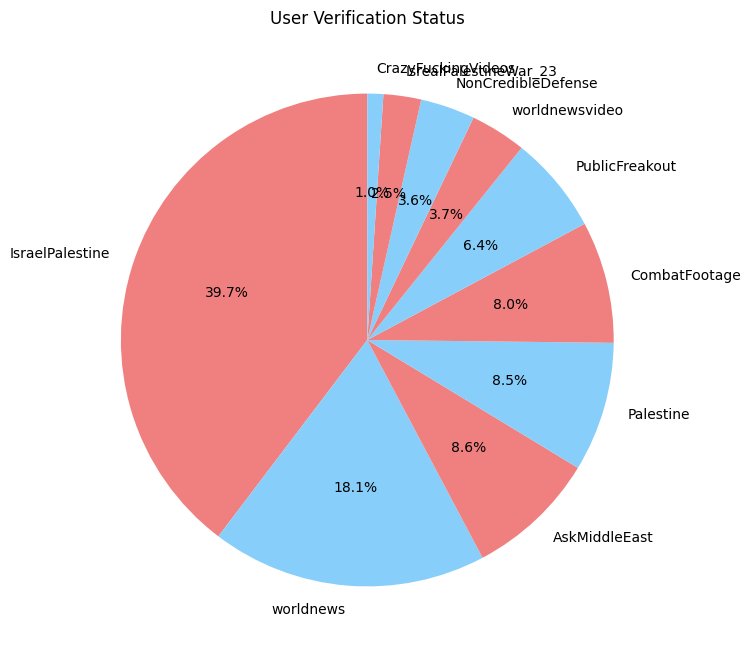

In [4]:
verification_counts = df['subreddit'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(verification_counts, labels=verification_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('User Verification Status')

Text(0.5, 1.0, 'Correlation Heatmap')

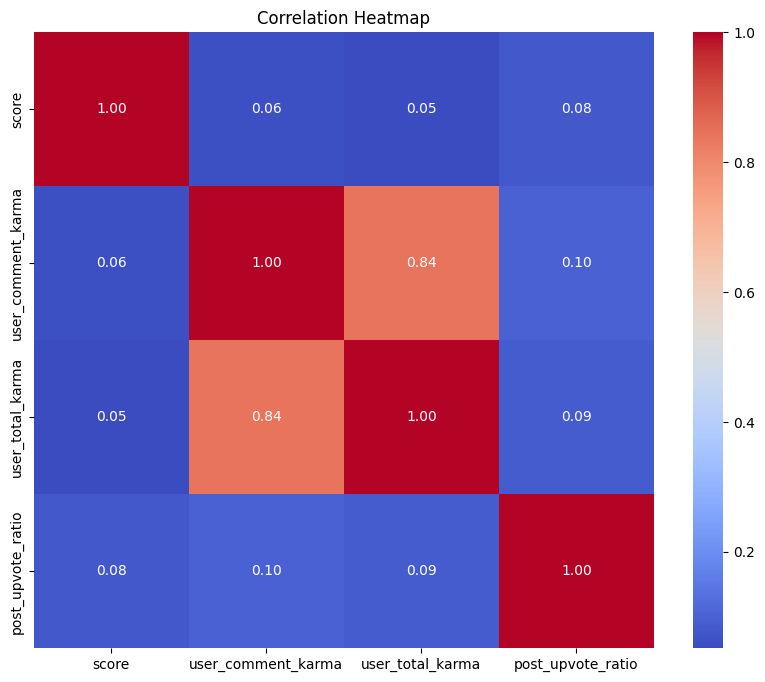

In [5]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

(-2000.0, 80000.0)

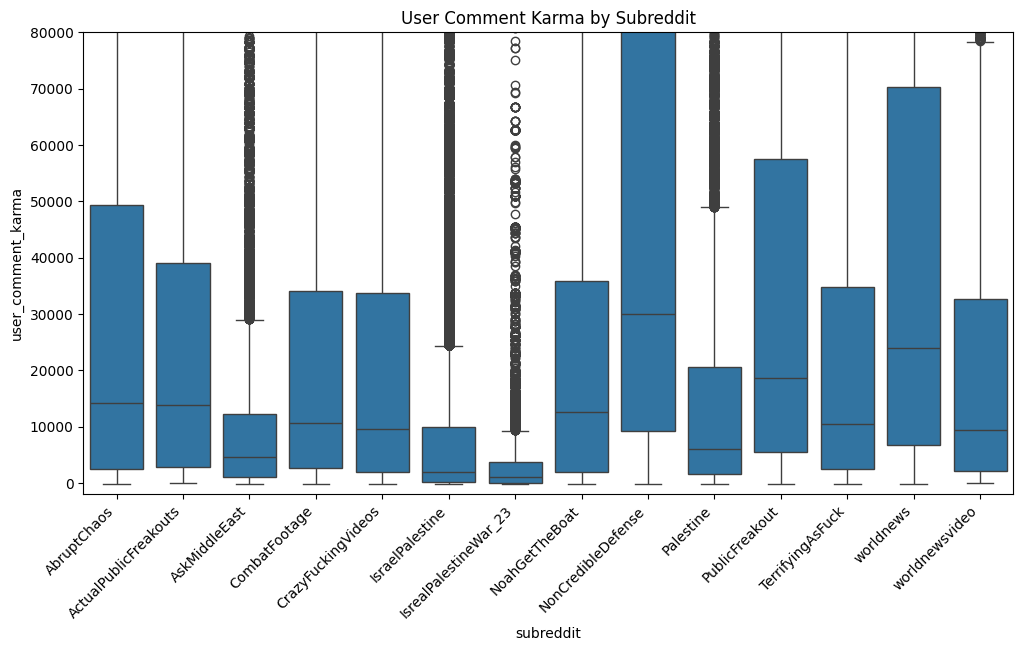

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subreddit', y='user_comment_karma', data=df)
plt.title('User Comment Karma by Subreddit')
plt.xticks(rotation=45, ha='right')
plt.ylim(-2000, 80000)

/tmp/ipykernel_41805/1354876206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_score_by_subreddit = df.groupby('subreddit')['score'].mean().sort_values(ascending=False)
/tmp/ipykernel_41805/1354876206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_score_by_subreddit.index, y=average_score_by_subreddit.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'AbruptChaos'),
  Text(1, 0, 'ActualPublicFreakouts'),
  Text(2, 0, 'AskMiddleEast'),
  Text(3, 0, 'CombatFootage'),
  Text(4, 0, 'CrazyFuckingVideos'),
  Text(5, 0, 'IsraelPalestine'),
  Text(6, 0, 'IsrealPalestineWar_23'),
  Text(7, 0, 'NoahGetTheBoat'),
  Text(8, 0, 'NonCredibleDefense'),
  Text(9, 0, 'Palestine'),
  Text(10, 0, 'PublicFreakout'),
  Text(11, 0, 'TerrifyingAsFuck'),
  Text(12, 0, 'worldnews'),
  Text(13, 0, 'worldnewsvideo')])

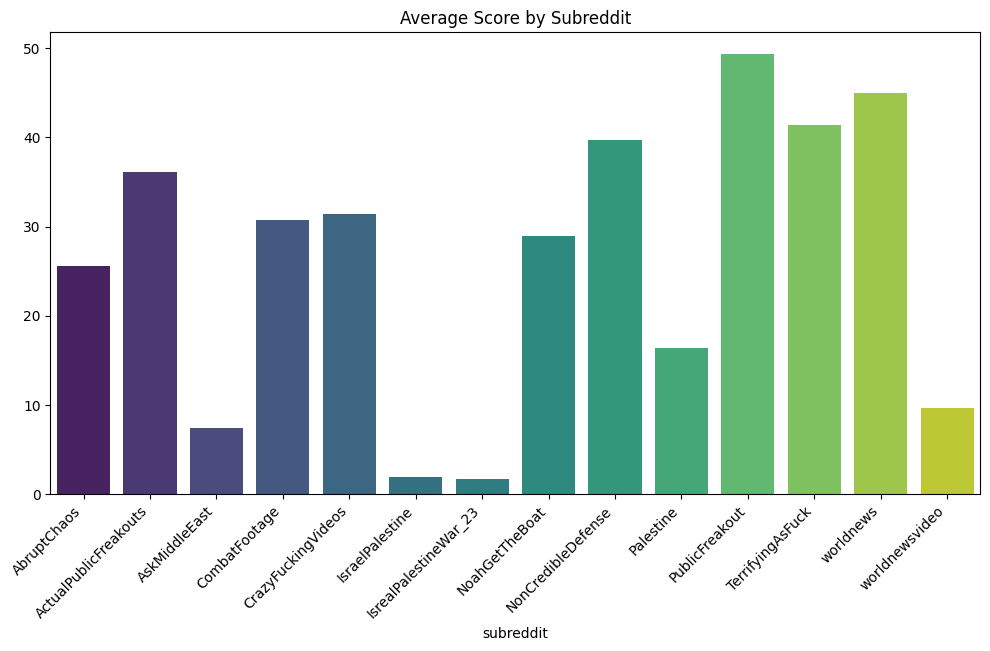

In [7]:
average_score_by_subreddit = df.groupby('subreddit')['score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_score_by_subreddit.index, y=average_score_by_subreddit.values, palette='viridis')
plt.title('Average Score by Subreddit')
plt.xticks(rotation=45, ha='right')